# SY09 - Projet : Wine Quality

Données : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

### Bibliothèques

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(10,6)})

### Import du data set:

In [2]:
wine_quality = pd.read_csv("data/WineQT.csv")

In [23]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## Analyse exploratoire:

### Corrélations entre les différentes variables quantitatives

<AxesSubplot:>

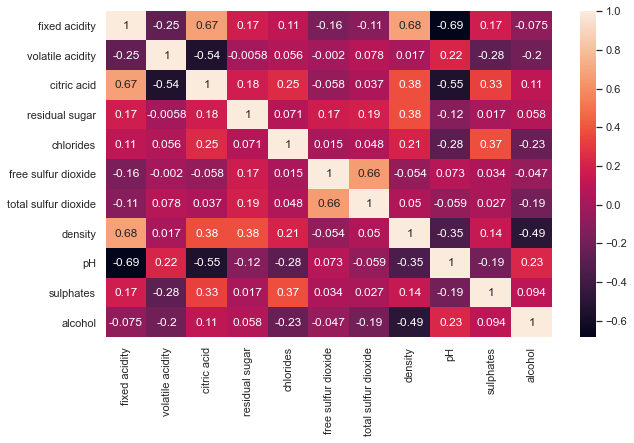

In [21]:
corr = wine_quality.drop("Id", axis=1).corr()
sns.heatmap(corr, annot = True)

### Distribution de la qualité du vin

<AxesSubplot:xlabel='quality', ylabel='count'>

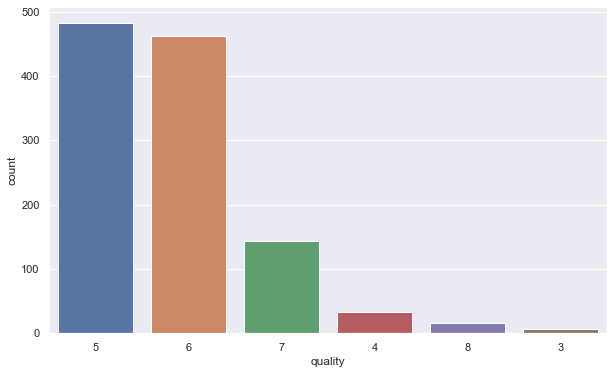

In [25]:
sns.countplot(
      x="quality",
      data=wine_quality
)

### Pairplot par qualité

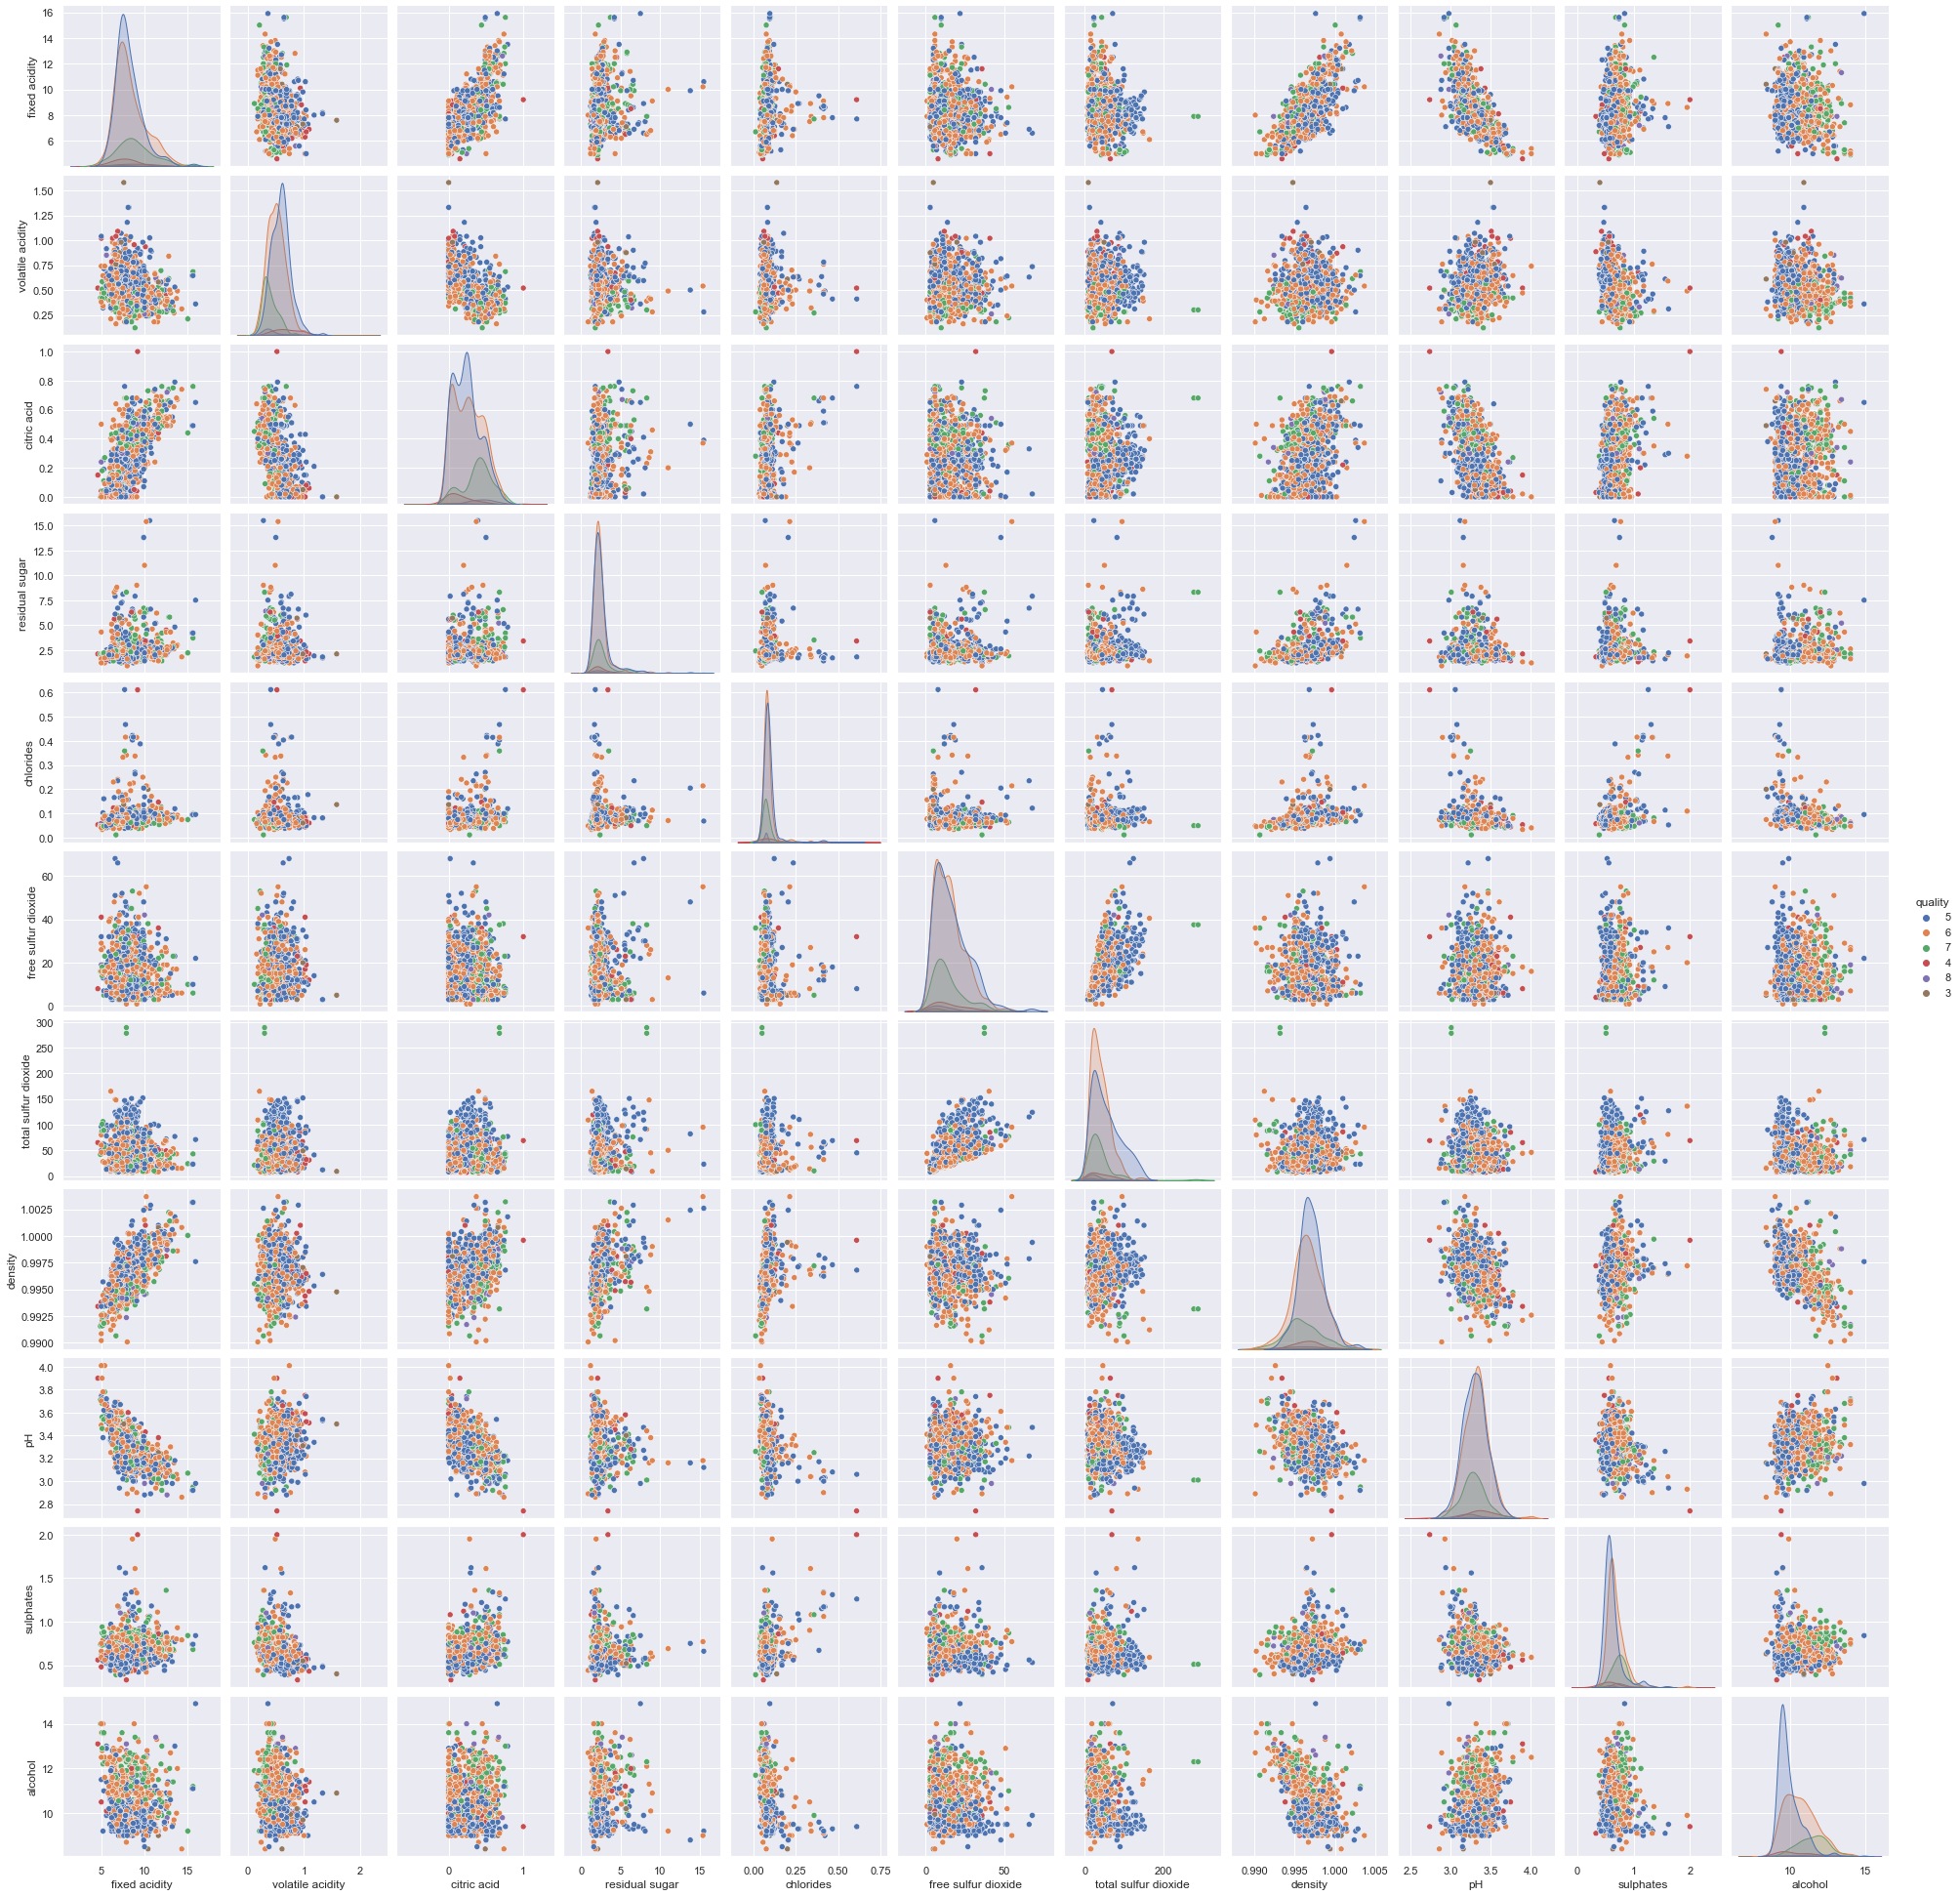

In [24]:
sns.pairplot(wine_quality.drop("Id", axis=1), hue = "quality")

## Analyse En Composantes Principales

In [27]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [41]:
cls = PCA(n_components = 4)
pcs = cls.fit_transform(wine_quality.loc[:,('total sulfur dioxide', 'alcohol', 'density', 'volatile acidity', 'citric acid')])

In [42]:
pcs_Y = cls.transform(wine_quality.loc[:,('total sulfur dioxide', 'alcohol', 'density', 'volatile acidity', 'citric acid')])

In [43]:
cls.explained_variance_ratio_ #Presque 100% de l'information est présente sur l'axe 1

array([9.98884342e-01, 1.05160318e-03, 4.95521723e-05, 1.45004453e-05])

In [44]:
df_pca = pd.DataFrame(pcs_Y, columns=["X1", "X2", "X3", "X4"])
df_pca = df_pca.join(wine_quality.loc[:,("quality")])
df_pca

,X1,X2,X3,X4,quality
0,-11.907974,-1.127145,0.271852,-0.047870,5
1,21.088974,-0.528237,0.406395,0.082701,5
2,8.089184,-0.604162,0.297505,0.020639,5
3,14.088978,-0.538821,-0.407622,-0.021817,6
4,-11.907974,-1.127145,0.271852,-0.047870,5
...,...,...,...,...,...
1138,-5.918092,0.518204,0.114138,-0.095506,6
1139,-7.908690,-0.997822,0.163804,-0.059204,6
1140,-1.915033,0.039342,0.190938,-0.065273,5
1141,5.080461,0.784448,0.172041,-0.085705,6


<AxesSubplot:xlabel='X1', ylabel='X3'>

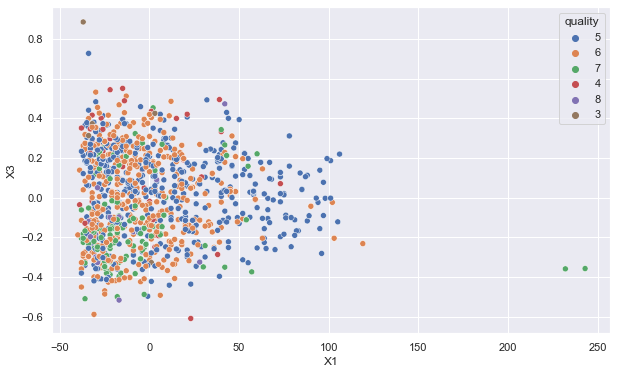

In [46]:
sns.scatterplot(
    x="X1",
    y="X3",
    hue="quality",
    data=df_pca
)

### Etude des axes de l'ACP:

In [47]:
# TODO

## Kmeans sur le résultat de l'ACP

In [48]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=2, init="random")

In [49]:
cls.fit(pcs_Y)

KMeans(init='random', n_clusters=2)

<AxesSubplot:xlabel='X1', ylabel='X2'>

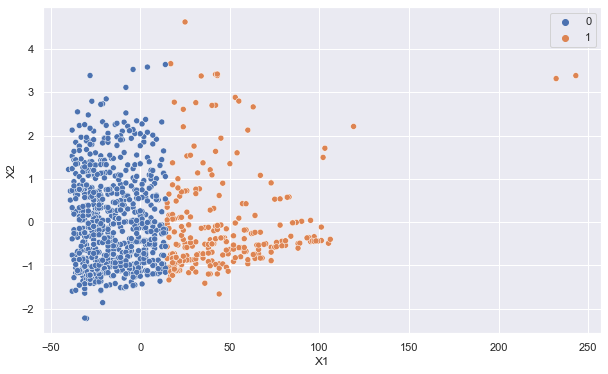

In [50]:
sns.scatterplot(
    x="X1",
    y="X2",
    hue=cls.labels_,
    data=df_pca
)

In [51]:
# Faire de l'oversampling ou bien de l'undersampling ?